In [9]:
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz
from sklearn import metrics

In [12]:
#read values from excel
train_data = pd.read_excel('/content/drive/MyDrive/Asssignment4_Data.xlsx', sheet_name='Train',header=0).to_numpy()
test_data = pd.read_excel('/content/drive/MyDrive/Asssignment4_Data.xlsx', sheet_name='Test',header=0).to_numpy()

In [13]:
#Get the trainign and test data and corresponding labels
x_train = train_data[:,1:-1]
y_train = train_data[:,-1]
x_test = test_data[:,1:-1]
y_test = test_data[:,-1]

[Text(0.5, 0.9166666666666666, 'X[7] <= 36.0\ngini = 0.665\nsamples = 20\nvalue = [7, 6, 7]'),
 Text(0.3, 0.75, 'X[0] <= 8.411\ngini = 0.56\nsamples = 10\nvalue = [2, 2, 6]'),
 Text(0.2, 0.5833333333333334, 'X[7] <= 19.5\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3, 0.4166666666666667, 'X[3] <= 1.173\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(0.2, 0.25, 'X[7] <= 31.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.4, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.7, 0.75, 'X[0] <= 4.55\ngini = 0.58\nsamples = 10\nvalue = [5, 4, 1]'),
 Text(0.6, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.58333333

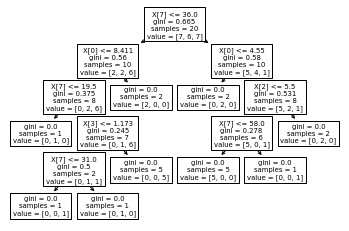

In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
tree.plot_tree(clf)

In [17]:
features = pd.read_excel('Asssignment4_Data.xlsx', sheet_name='Train',header=0).columns.to_numpy()
features = features[1:9]
classes = clf.classes_   #'Apartment, 'Condo', 'House'

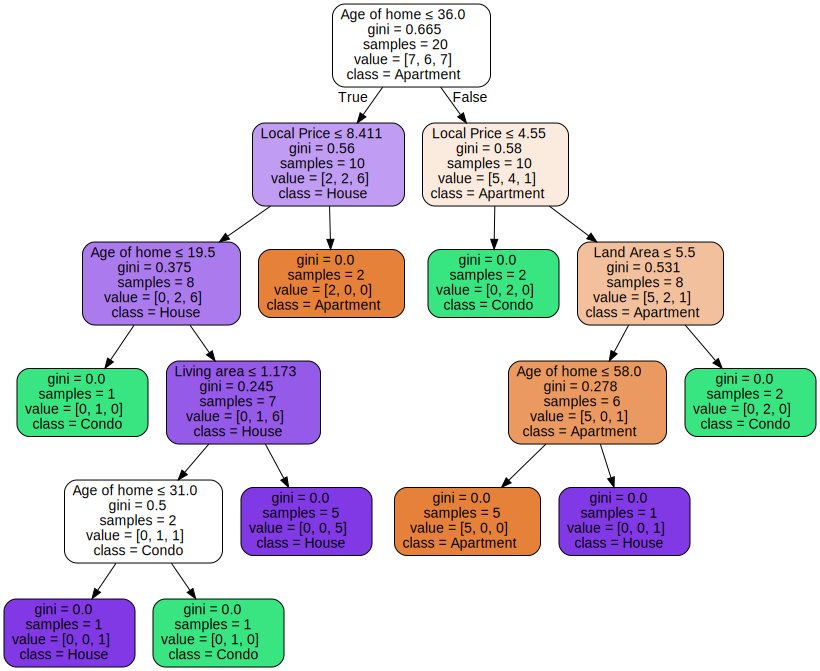

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names=classes,  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [20]:
#Test on training data
y_trn_predicted = clf.predict(x_train)

print("Given labels in training data: ", y_train)
print("Predicted labels:          ", y_trn_predicted)

print("Test accuracy (%):",metrics.accuracy_score(y_train, y_trn_predicted)*100)

Given labels in training data:  ['Apartment' 'House' 'Condo' 'Apartment' 'Apartment' 'Condo' 'Condo'
 'House' 'Condo' 'Apartment' 'House' 'House' 'House' 'Condo' 'Apartment'
 'House' 'Apartment' 'House' 'Condo' 'Apartment']
Predicted labels:           ['Apartment' 'House' 'Condo' 'Apartment' 'Apartment' 'Condo' 'Condo'
 'House' 'Condo' 'Apartment' 'House' 'House' 'House' 'Condo' 'Apartment'
 'House' 'Apartment' 'House' 'Condo' 'Apartment']
Test accuracy (%): 100.0


In [21]:
#Test on test data
y_test_predicted = clf.predict(x_test)

print("Given labels in test data: ", y_test)
print("Predicted labels:          ", y_test_predicted)

print("Test accuracy (%):",metrics.accuracy_score(y_test, y_test_predicted)*100)

Given labels in test data:  ['Apartment' 'House' 'House' 'Apartment' 'Apartment']
Predicted labels:           ['Condo' 'Condo' 'Condo' 'Apartment' 'Apartment']
Test accuracy (%): 40.0


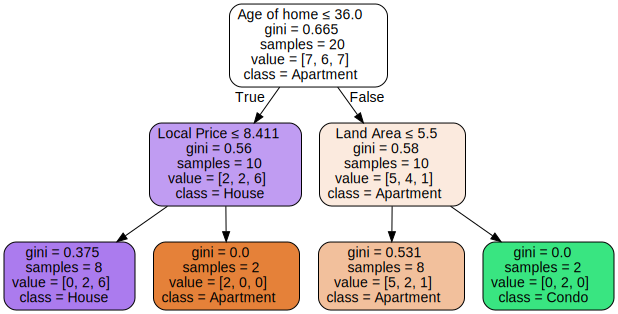

In [22]:
#Limit the depth
clf_limited_depth = tree.DecisionTreeClassifier(max_depth = 2)
clf_limited_depth = clf_limited_depth.fit(x_train, y_train)
dot_data_limited_depth = tree.export_graphviz(clf_limited_depth, out_file=None, feature_names=features, class_names=classes,  filled=True, rounded=True,  special_characters=True)  
graph_limited_depth = graphviz.Source(dot_data_limited_depth)  
graph_limited_depth

In [23]:
#Test on training data
y_trn_predicted = clf_limited_depth.predict(x_train)

print("Given labels in training data: ", y_train)
print("Predicted labels:          ", y_trn_predicted)

print("Test accuracy (%):",metrics.accuracy_score(y_train, y_trn_predicted)*100)

#Test on test data
y_test_predicted = clf_limited_depth.predict(x_test)

print("Given labels in test data: ", y_test)
print("Predicted labels:          ", y_test_predicted)

print("Test accuracy (%):",metrics.accuracy_score(y_test, y_test_predicted)*100)

Given labels in training data:  ['Apartment' 'House' 'Condo' 'Apartment' 'Apartment' 'Condo' 'Condo'
 'House' 'Condo' 'Apartment' 'House' 'House' 'House' 'Condo' 'Apartment'
 'House' 'Apartment' 'House' 'Condo' 'Apartment']
Predicted labels:           ['Apartment' 'Apartment' 'Apartment' 'Apartment' 'Apartment' 'Apartment'
 'Condo' 'House' 'Condo' 'Apartment' 'House' 'House' 'House' 'House'
 'Apartment' 'House' 'Apartment' 'House' 'House' 'Apartment']
Test accuracy (%): 75.0
Given labels in test data:  ['Apartment' 'House' 'House' 'Apartment' 'Apartment']
Predicted labels:           ['Condo' 'Condo' 'House' 'Apartment' 'Apartment']
Test accuracy (%): 60.0


## Report

1. Use the default parameters.

    a. What is the accuracy on the training set?
    
    b. What is the accuracy on the test set?

### Answer
Using the default parameters the classifier becomes really overfit. The accuracy on the training data is 100% and the accuracy on the test data is 40%.

2. What is the effect of restricting the maximum depth of the tree? Try different depths and
find the best value.

### Answer
Restricting the depth reduces the train accuracy but improves the test accuracy. The maximum depth with the best accuracy was found to be at 2.

3. Why does restricting the depth have such a strong effect on the classifier performance?

### Answer
Larger the depth of the tree more are the chances of variance(overfitting). It reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting. 

4. Visualize the resulting tree. Perform the inference on this tree manually (i.e. show/trace
the path taken towards classification) and provide a classification for the following
example:

### Answer
For the given data, test accuracy on the training data is 75% and on the test data is 60%.